In [216]:
import pandas as pd
import numpy as np

    # Load the dataset
df = pd.read_csv('train.csv', index_col= 0)

# Set the random seed
np.random.seed(7532)

# Sample 100,000 rows
df = df.sample(n=100000)


In [217]:
df.head()

vendor_id      pickup_datetime     dropoff_datetime  \
id                                                               
id0139882          2  2016-04-04 12:11:04  2016-04-04 12:14:50   
id3563828          2  2016-01-21 22:05:08  2016-01-21 22:42:33   
id2921124          2  2016-03-11 11:36:43  2016-03-11 11:41:40   
id1493122          1  2016-04-05 10:37:41  2016-04-05 11:06:49   
id3397260          2  2016-02-20 21:43:04  2016-02-20 21:52:12   

           passenger_count  pickup_longitude  pickup_latitude  \
id                                                              
id0139882                2        -74.007576        40.737610   
id3563828                6        -73.974251        40.759789   
id2921124                3        -73.984741        40.779465   
id1493122                1        -74.001869        40.723255   
id3397260                2        -73.935791        40.799801   

           dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
id                                                                  
id0139882         -74.000870         40.737404                  N   
id3563828         -73.991913         40.684860                  N   
id2921124         -73.972885         40.790508                  N   
id1493122         -73.981636         40.758488                  N   
id3397260         -73.952713         40.807980                  N   

           trip_duration  
id                        
id0139882            226  
id3563828           2245  
id2921124            297  
id1493122           1748  
id3397260            548

1. **Data Pre-processing**:

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, id0139882 to id3731007
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   vendor_id           100000 non-null  int64  
 1   pickup_datetime     100000 non-null  object 
 2   dropoff_datetime    100000 non-null  object 
 3   passenger_count     100000 non-null  int64  
 4   pickup_longitude    100000 non-null  float64
 5   pickup_latitude     100000 non-null  float64
 6   dropoff_longitude   100000 non-null  float64
 7   dropoff_latitude    100000 non-null  float64
 8   store_and_fwd_flag  100000 non-null  object 
 9   trip_duration       100000 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 8.4+ MB


In [219]:
df.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  100000.000000    100000.000000     100000.000000    100000.000000   
mean        1.531950         1.664070        -73.973281        40.750861   
std         0.498981         1.315309          0.060122         0.036081   
min         1.000000         0.000000        -74.705368        35.310307   
25%         1.000000         1.000000        -73.991983        40.737289   
50%         2.000000         1.000000        -73.981834        40.753910   
75%         2.000000         2.000000        -73.967459        40.768276   
max         2.000000         7.000000        -61.335529        44.371944   

       dropoff_longitude  dropoff_latitude  trip_duration  
count      100000.000000     100000.000000  100000.000000  
mean          -73.973000         40.751646     934.945520  
std             0.057405          0.038997    2889.359737  
min           -76.135719         35.173546       1.000000  
25%           -73.991341         40.735512     399.000000  
50%           -73.979691         40.754410     665.000000  
75%           -73.963043         40.769733    1076.000000  
max           -61.335529         43.147583   86349.000000

In [220]:
df.shape

(100000, 10)

In [221]:
df.dtypes

vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [222]:
df.isnull().sum()

vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

checking null values, since there are no null values in the data

In [223]:
df.shape

(100000, 10)

To identify how many rows and columns in dataset

In [224]:
df.head()

vendor_id      pickup_datetime     dropoff_datetime  \
id                                                               
id0139882          2  2016-04-04 12:11:04  2016-04-04 12:14:50   
id3563828          2  2016-01-21 22:05:08  2016-01-21 22:42:33   
id2921124          2  2016-03-11 11:36:43  2016-03-11 11:41:40   
id1493122          1  2016-04-05 10:37:41  2016-04-05 11:06:49   
id3397260          2  2016-02-20 21:43:04  2016-02-20 21:52:12   

           passenger_count  pickup_longitude  pickup_latitude  \
id                                                              
id0139882                2        -74.007576        40.737610   
id3563828                6        -73.974251        40.759789   
id2921124                3        -73.984741        40.779465   
id1493122                1        -74.001869        40.723255   
id3397260                2        -73.935791        40.799801   

           dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
id                                                                  
id0139882         -74.000870         40.737404                  N   
id3563828         -73.991913         40.684860                  N   
id2921124         -73.972885         40.790508                  N   
id1493122         -73.981636         40.758488                  N   
id3397260         -73.952713         40.807980                  N   

           trip_duration  
id                        
id0139882            226  
id3563828           2245  
id2921124            297  
id1493122           1748  
id3397260            548

In [225]:
df.dtypes

vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

Describing the data types in the dataset

In [226]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])
df['store_and_fwd_flag']=df['store_and_fwd_flag'].astype(bool)
df['pickup_datetime']=pd.to_numeric(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_numeric(df['dropoff_datetime'])

>Here pickup_datetime, dropoff_datetime converts df format using pd.to_datatime into dates and times in a more structured way
>The store_and_fwd_flag converts into boolean type. 
>And pickup_datatime and dropoff_datetime convert datetime columns to their 
numeric representations, which can be useful for certain calculations or machine learning models that work better with numeric data.

In [227]:
df.dtypes

vendor_id               int64
pickup_datetime         int64
dropoff_datetime        int64
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag       bool
trip_duration           int64
dtype: object

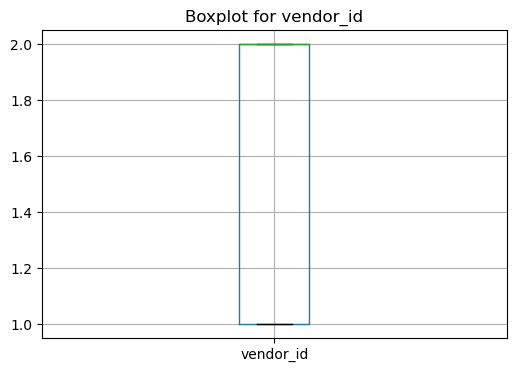

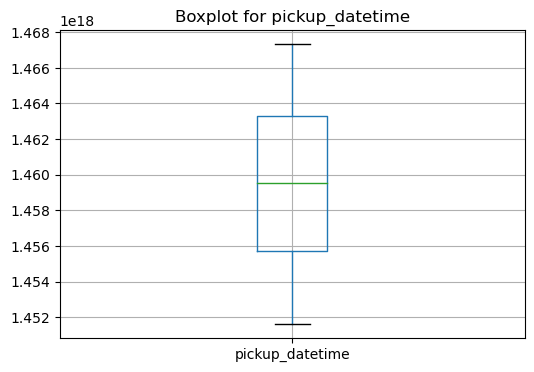

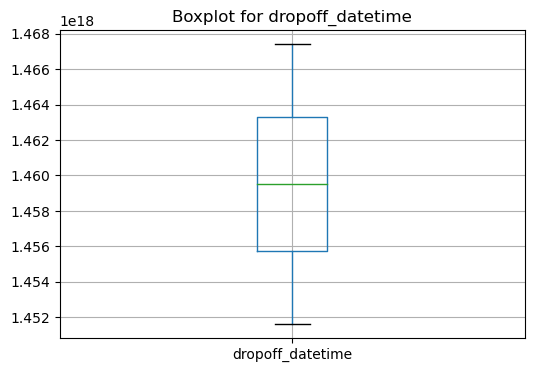

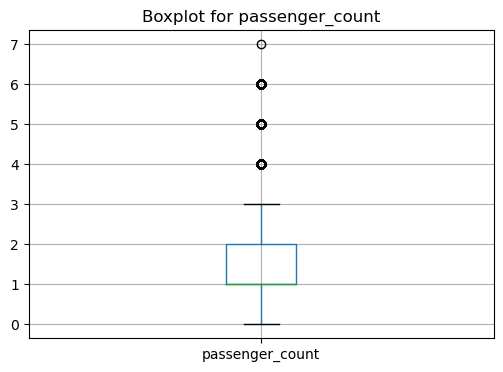

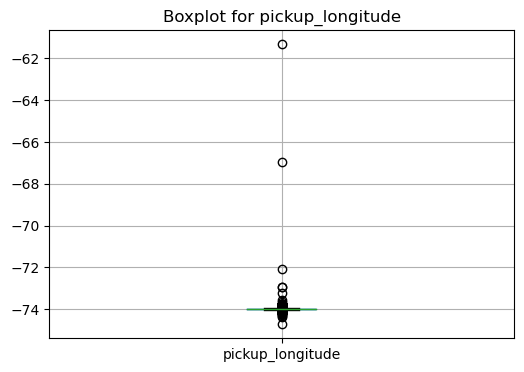

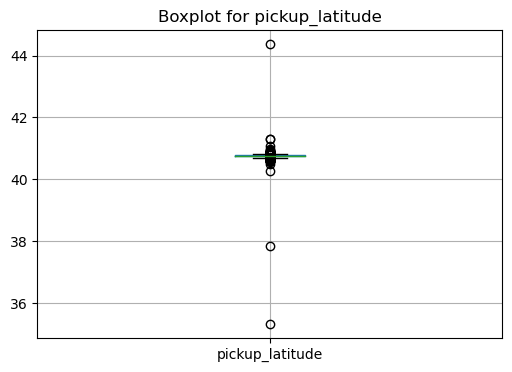

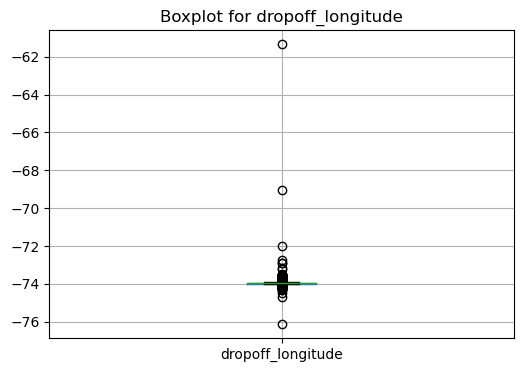

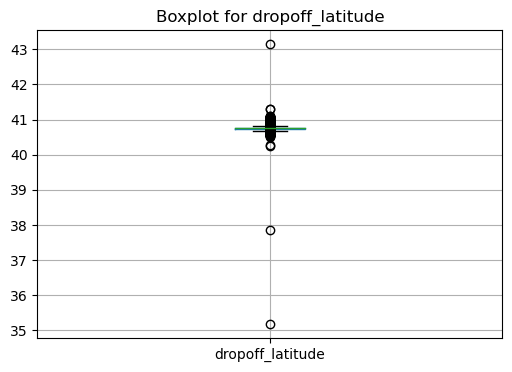

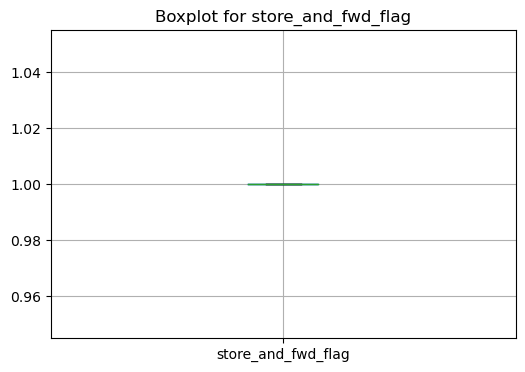

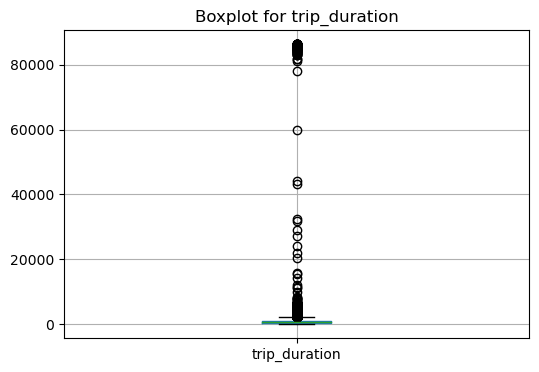

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt
for column in df.columns:
    if df[column].dtype != 'object':
        plt.figure(figsize=(6, 4))
        df.boxplot(column=[column])
        plt.title(f'Boxplot for {column}')
        plt.show()
    
    

An outlier is an observation or data point that significantly differs from the majority of the other observations in a dataset.
This are outlier using boxplot

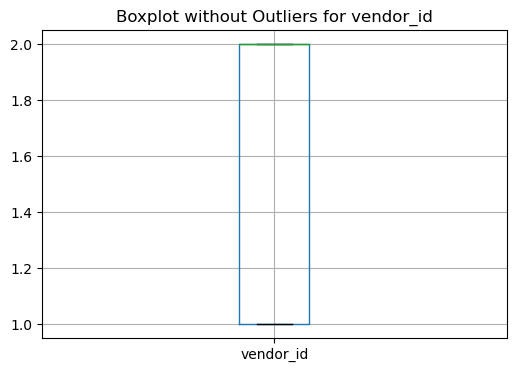

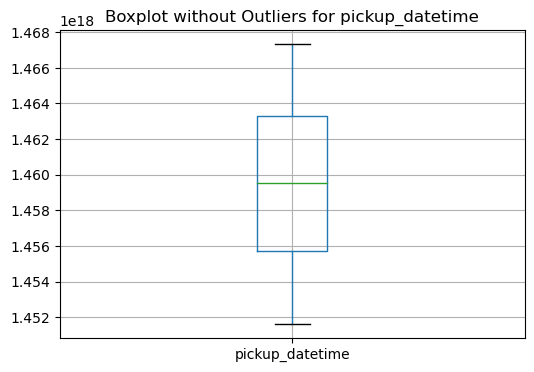

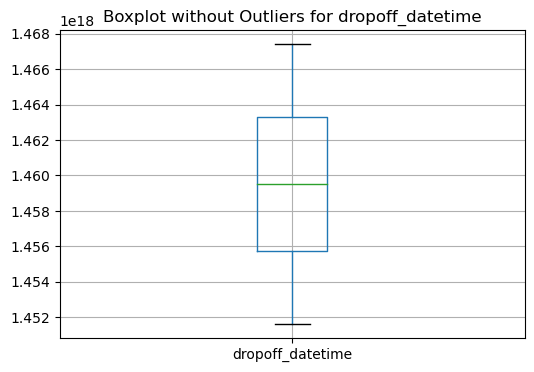

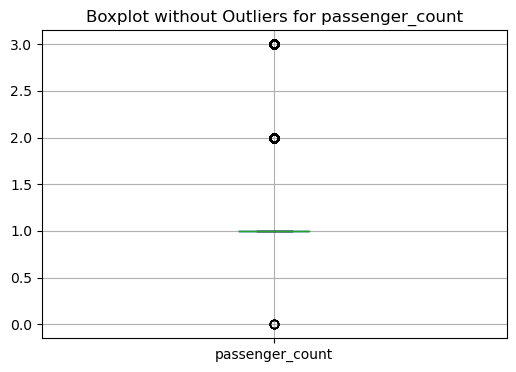

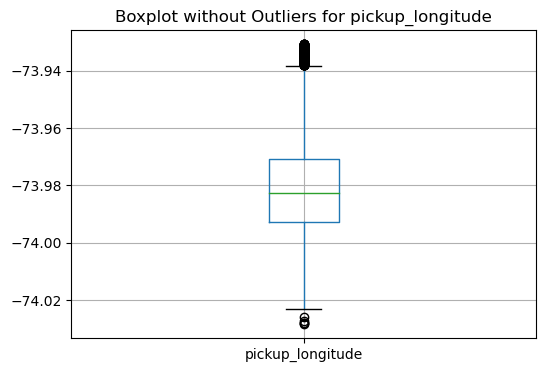

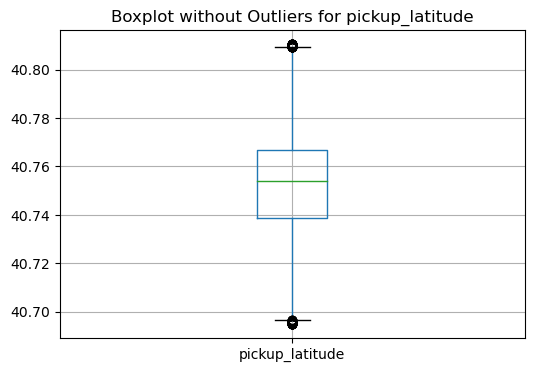

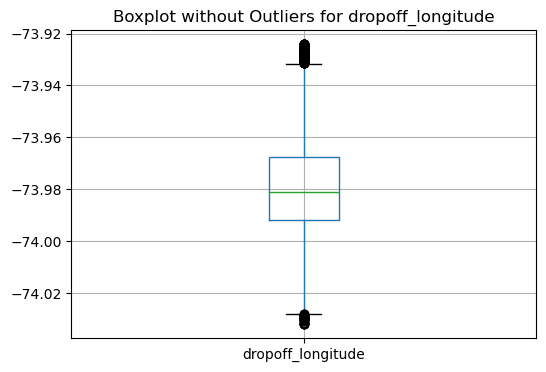

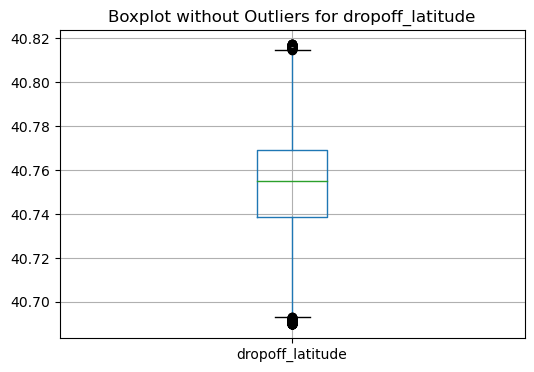

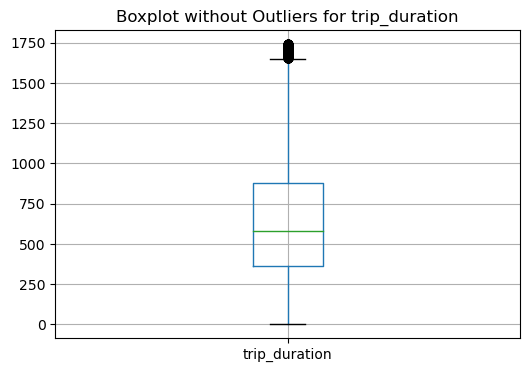

In [229]:
def remove_outlier(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Loop through columns and remove outliers
for column in df.columns:
    if df[column].dtype != 'bool':
        plt.figure(figsize=(6, 4))
        df = remove_outlier(df, column)
        df.boxplot(column=[column])
        plt.title(f'Boxplot without Outliers for {column}')
        plt.show()


The above figures are after removing the outliers so the dataset is cleaner and more suitable for analysis

2. **Discovering Relationships**:

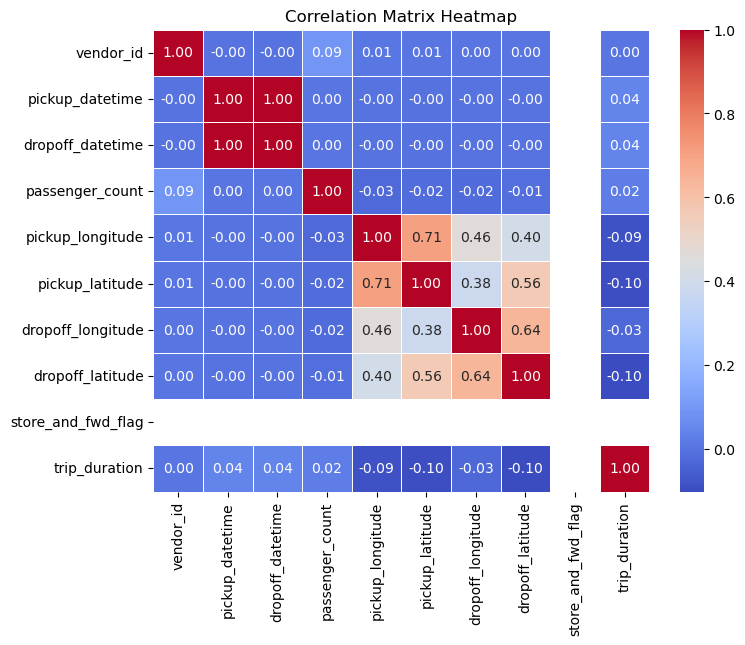

In [230]:
corr=df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Correlation matrices can be visualized using heatmaps, where colors represent the strength and direction of the correlation. Strong positive correlations are often represented by red strong negative correlations by blue.

Here the pickup_latitude and pickup_longitude has strong correlation is 1.00 . There is a strong positive linear relationship between the variables. As one variable increases, the other tends to increase as well.

Here the most values are 0.00 it means there is no linear relationship between the variables. changes in one variable do not predict changes in the other

In [231]:
df["longitude_difference"]=abs(df["pickup_longitude"]-df["dropoff_longitude"])
df["latitude_difference"]=abs(df['dropoff_latitude'])-df['pickup_latitude']
df["week_day"]=df["pickup_datetime"]

Here creating new column for better results.

In [232]:
df.head()

vendor_id      pickup_datetime     dropoff_datetime  \
id                                                               
id0139882          2  1459771864000000000  1459772090000000000   
id2921124          2  1457696203000000000  1457696500000000000   
id3397260          2  1456004584000000000  1456005132000000000   
id3188964          1  1457382233000000000  1457382709000000000   
id2723941          1  1457234609000000000  1457235584000000000   

           passenger_count  pickup_longitude  pickup_latitude  \
id                                                              
id0139882                2        -74.007576        40.737610   
id2921124                3        -73.984741        40.779465   
id3397260                2        -73.935791        40.799801   
id3188964                1        -73.979942        40.765545   
id2723941                2        -74.006989        40.744030   

           dropoff_longitude  dropoff_latitude  store_and_fwd_flag  \
id                                                                   
id0139882         -74.000870         40.737404                True   
id2921124         -73.972885         40.790508                True   
id3397260         -73.952713         40.807980                True   
id3188964         -73.984222         40.774754                True   
id2723941         -73.956612         40.768078                True   

           trip_duration  longitude_difference  latitude_difference  \
id                                                                    
id0139882            226              0.006706            -0.000206   
id2921124            297              0.011856             0.011044   
id3397260            548              0.016922             0.008179   
id3188964            476              0.004280             0.009209   
id2723941            975              0.050377             0.024048   

                      week_day  
id                              
id0139882  1459771864000000000  
id2921124  1457696203000000000  
id3397260  1456004584000000000  
id3188964  1457382233000000000  
id2723941  1457234609000000000

In [233]:
df.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'longitude_difference', 'latitude_difference', 'week_day'],
      dtype='object')

In [234]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

A = ['vendor_id','pickup_datetime','dropoff_datetime','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','store_and_fwd_flag']
for i in A:
    X= df[[i]]
    Y= df['trip_duration']
    lr = LinearRegression()
    lr.fit(X, Y)
    print(f'Train R^2 score for {i}: {round(lr.score(X, Y),5)}')

Train R^2 score for vendor_id: 0.0
Train R^2 score for pickup_datetime: 0.00162
Train R^2 score for dropoff_datetime: 0.00163
Train R^2 score for passenger_count: 0.00057
Train R^2 score for pickup_longitude: 0.00737
Train R^2 score for pickup_latitude: 0.00945
Train R^2 score for dropoff_longitude: 0.00099
Train R^2 score for dropoff_latitude: 0.01038
Train R^2 score for store_and_fwd_flag: 0.0


R^2 provides a measure of how well the regression model fits the observed data. A higher R^2 indicates a better fit, meaning that a larger proportion of the variability in the dependent variable is accounted for by the independent variables.


Among the columns, dropoff_latitude has the highest R^2 score of 0.01038. Here the linear regression model there is only 1% out of 100 records from the given dataset. So the dataset is less significance so the model will be useless. 

To identify the significance we are creating the one column between pickup_longitude and dropoff_longitude and also dropoff_latitude, dropoff_latitude.
The code is below


In [235]:
df["longitude_difference"]=abs(df["pickup_longitude"]-df["dropoff_longitude"])
df["latitude_difference"]=abs(df['dropoff_latitude'])-df['pickup_latitude']
df["week_day"]=df["pickup_datetime"]

After creating the new column for better results

In [236]:
df.head()

vendor_id      pickup_datetime     dropoff_datetime  \
id                                                               
id0139882          2  1459771864000000000  1459772090000000000   
id2921124          2  1457696203000000000  1457696500000000000   
id3397260          2  1456004584000000000  1456005132000000000   
id3188964          1  1457382233000000000  1457382709000000000   
id2723941          1  1457234609000000000  1457235584000000000   

           passenger_count  pickup_longitude  pickup_latitude  \
id                                                              
id0139882                2        -74.007576        40.737610   
id2921124                3        -73.984741        40.779465   
id3397260                2        -73.935791        40.799801   
id3188964                1        -73.979942        40.765545   
id2723941                2        -74.006989        40.744030   

           dropoff_longitude  dropoff_latitude  store_and_fwd_flag  \
id                                                                   
id0139882         -74.000870         40.737404                True   
id2921124         -73.972885         40.790508                True   
id3397260         -73.952713         40.807980                True   
id3188964         -73.984222         40.774754                True   
id2723941         -73.956612         40.768078                True   

           trip_duration  longitude_difference  latitude_difference  \
id                                                                    
id0139882            226              0.006706            -0.000206   
id2921124            297              0.011856             0.011044   
id3397260            548              0.016922             0.008179   
id3188964            476              0.004280             0.009209   
id2723941            975              0.050377             0.024048   

                      week_day  
id                              
id0139882  1459771864000000000  
id2921124  1457696203000000000  
id3397260  1456004584000000000  
id3188964  1457382233000000000  
id2723941  1457234609000000000

Checking the columns using head command .

Here checking the linear regreesion again 

In [237]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

A = ['vendor_id','pickup_datetime','dropoff_datetime','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','store_and_fwd_flag','longitude_difference', 'latitude_difference', 'week_day']
for i in A:
    X= df[[i]]
    Y= df['trip_duration']
    lr = LinearRegression()
    lr.fit(X, Y)
    print(f'Train R^2 score for {i}: {round(lr.score(X, Y),5)}')

Train R^2 score for vendor_id: 0.0
Train R^2 score for pickup_datetime: 0.00162
Train R^2 score for dropoff_datetime: 0.00163
Train R^2 score for passenger_count: 0.00057
Train R^2 score for pickup_longitude: 0.00737
Train R^2 score for pickup_latitude: 0.00945
Train R^2 score for dropoff_longitude: 0.00099
Train R^2 score for dropoff_latitude: 0.01038
Train R^2 score for store_and_fwd_flag: 0.0
Train R^2 score for longitude_difference: 0.27091
Train R^2 score for latitude_difference: 0.00022
Train R^2 score for week_day: 0.00162


Here longitude_difference has 0.27 it means 27% out of 100 records from the given dataset. There is minimum significance so the data can be used in the regreesion moel.

3. **Data Visualization**:

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

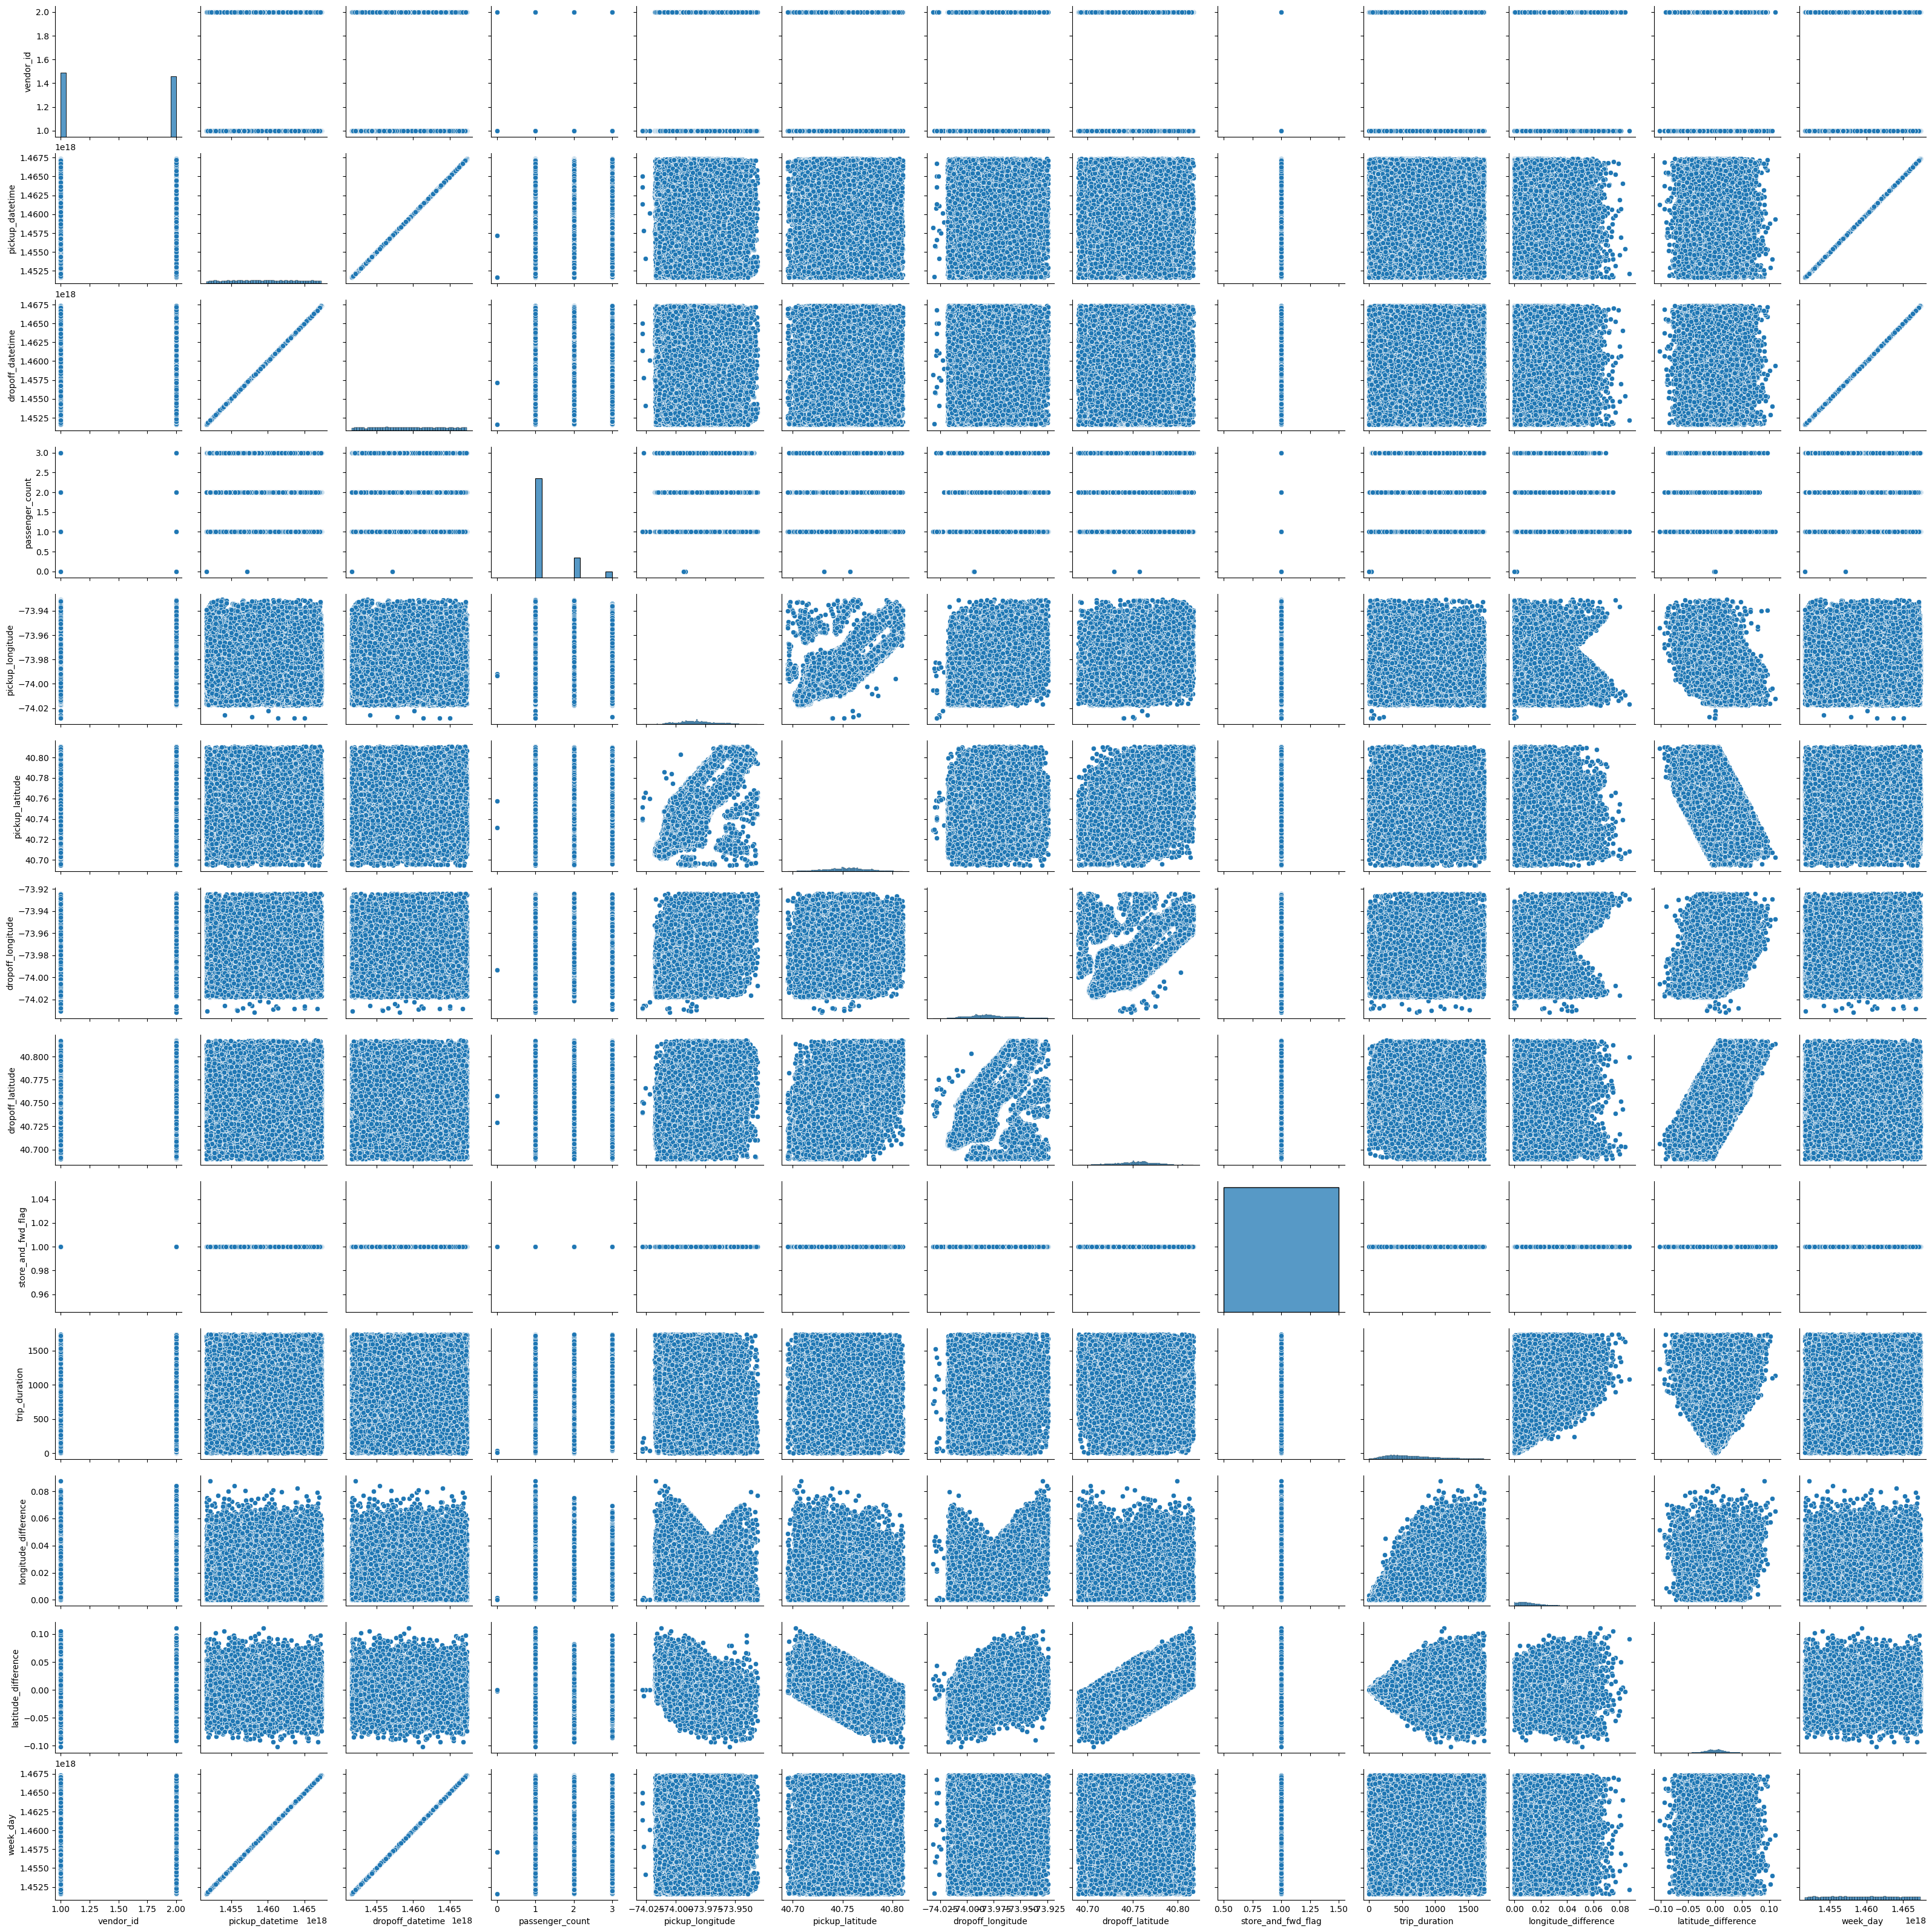

In [238]:
sns.pairplot(df)
plt.show()

Scatter plots can show the relationship between two continuous variables.

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


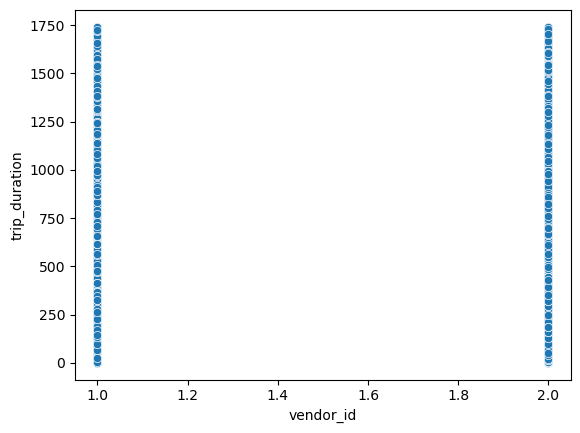

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


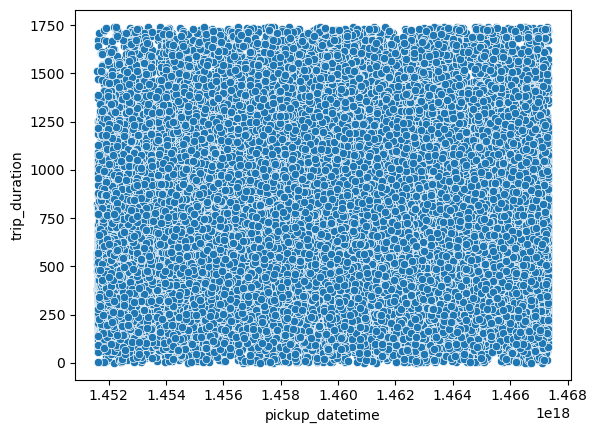

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


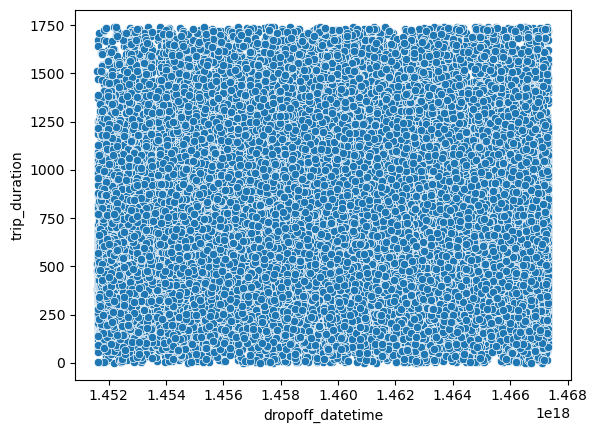

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


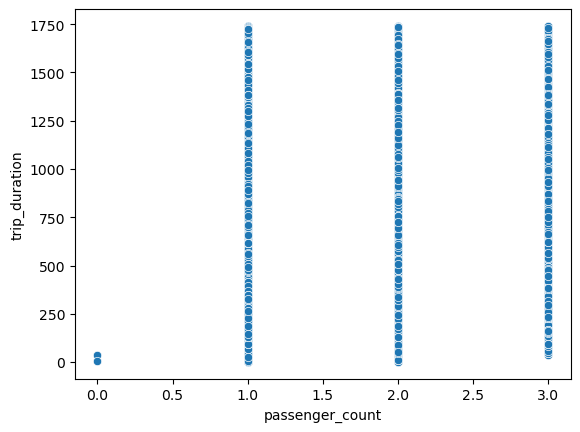

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


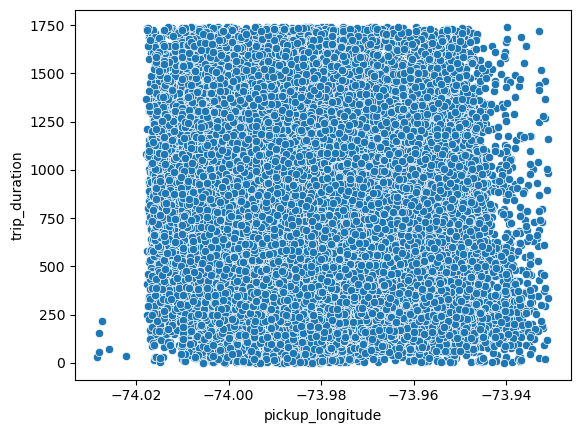

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


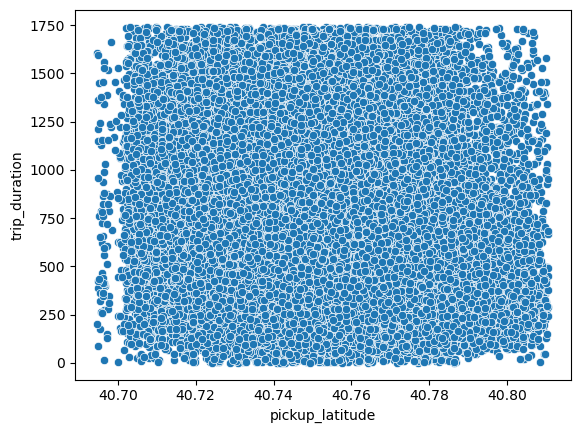

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


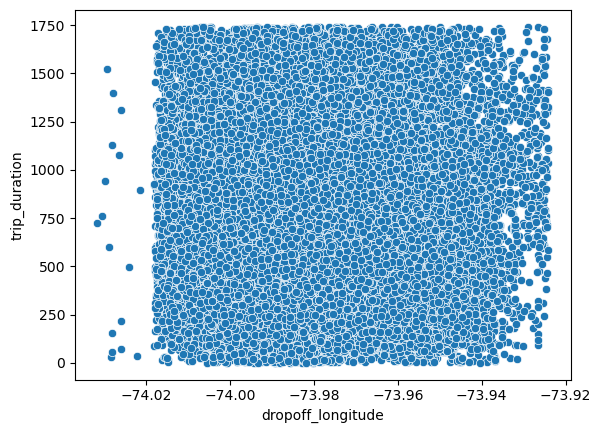

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


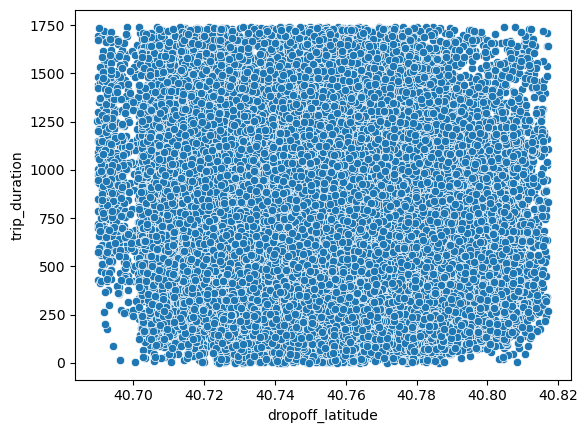

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


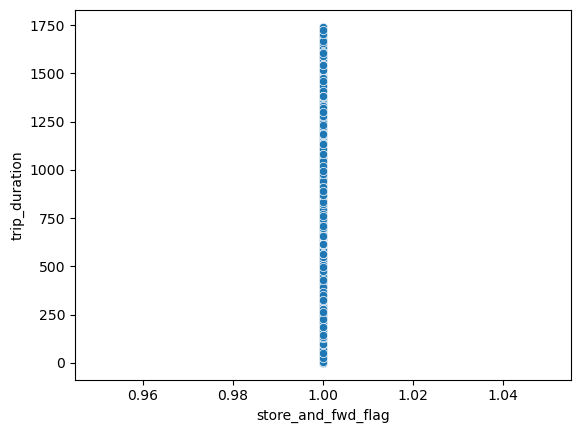

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


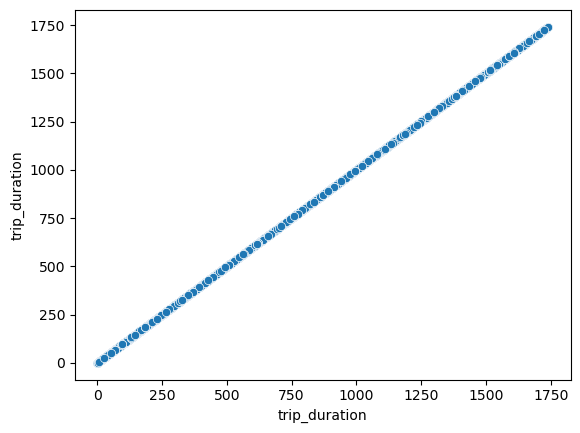

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


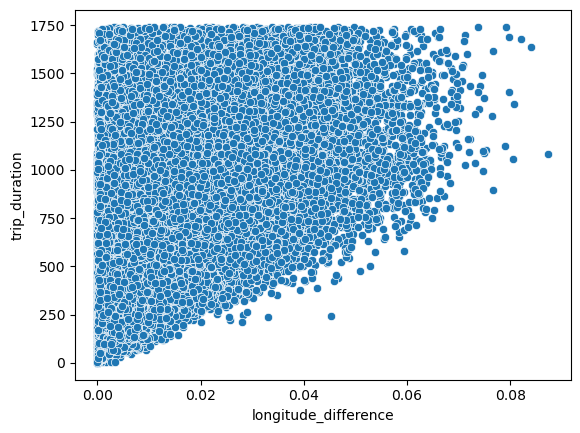

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


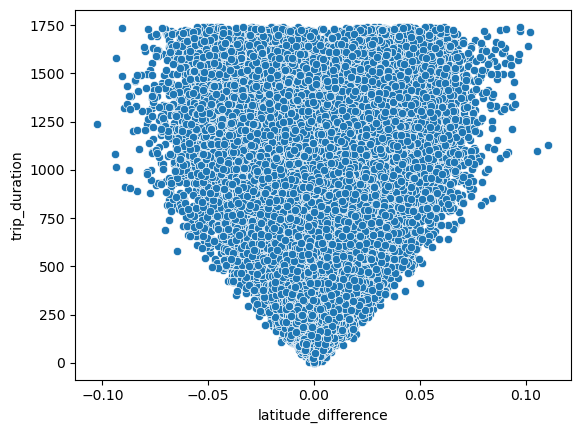

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


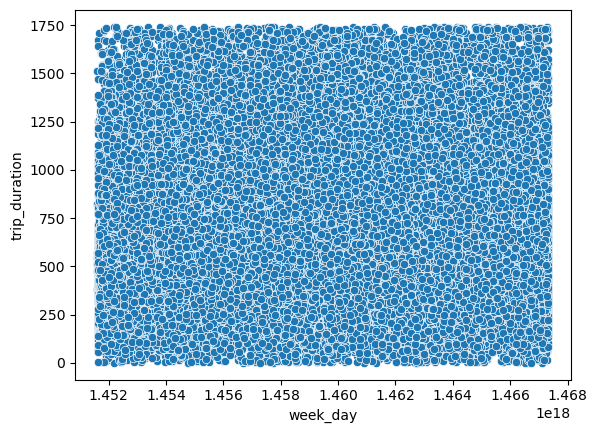

In [239]:
for column in df.columns:
    sns.scatterplot(data=df,x=column,y='trip_duration')
    plt.show()

Here the midial correlation between the trip duration and longtitude difference.

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


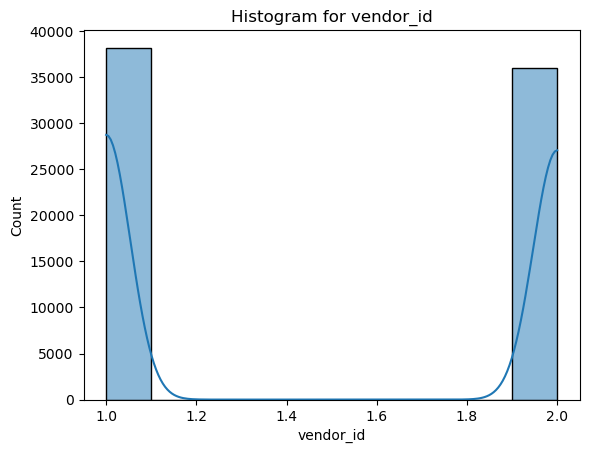

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


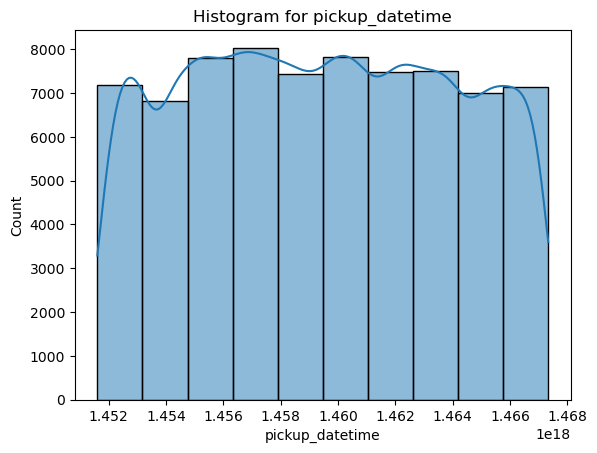

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


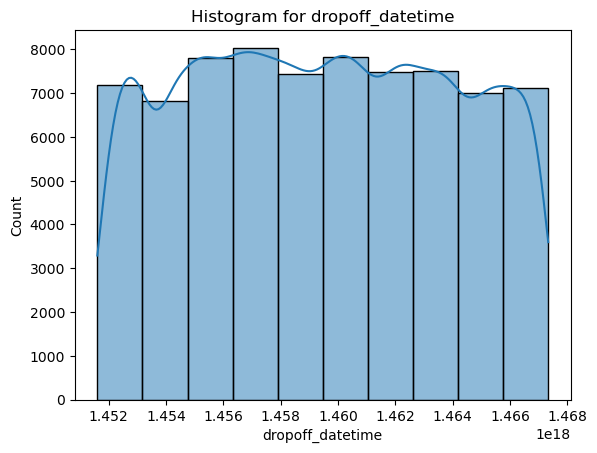

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


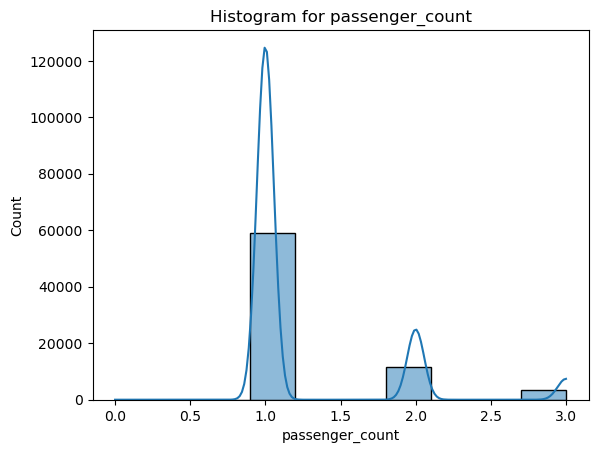

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


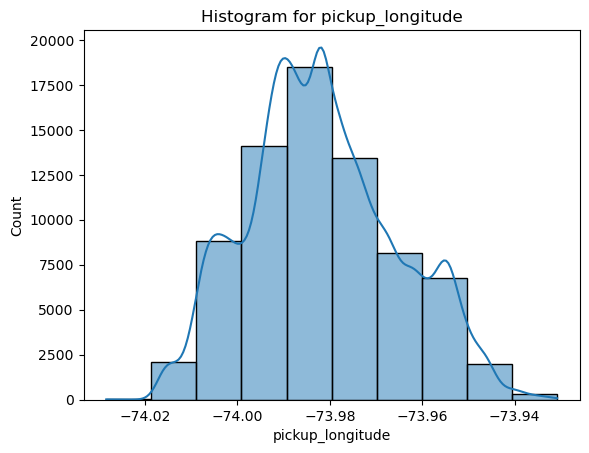

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


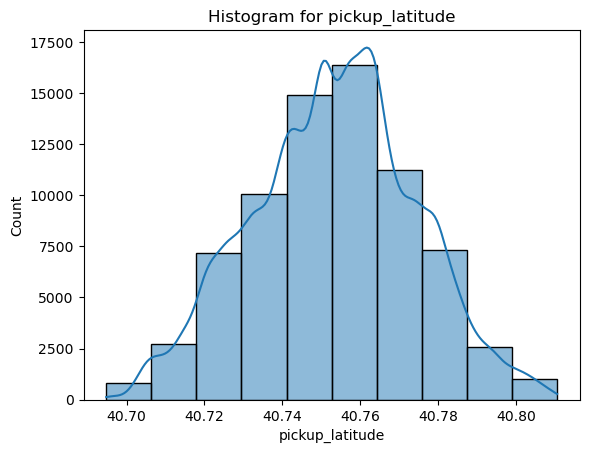

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


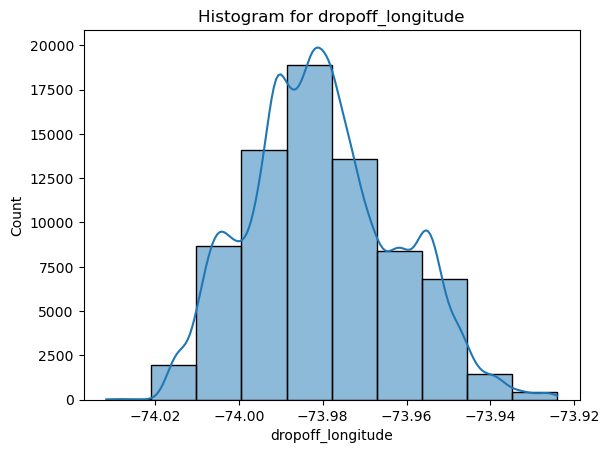

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


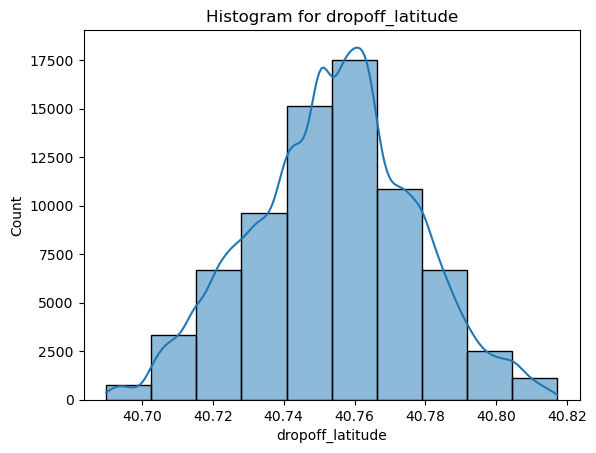

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


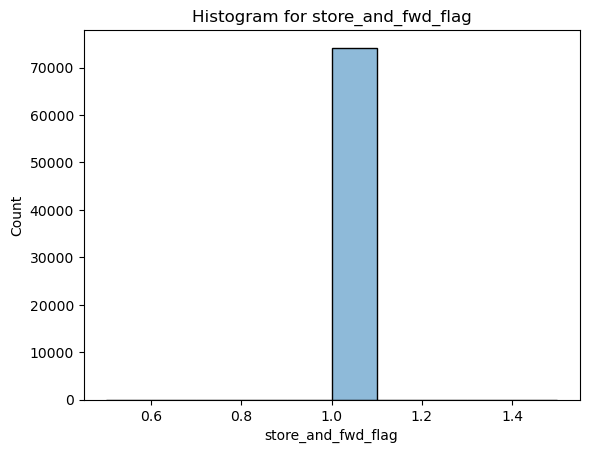

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


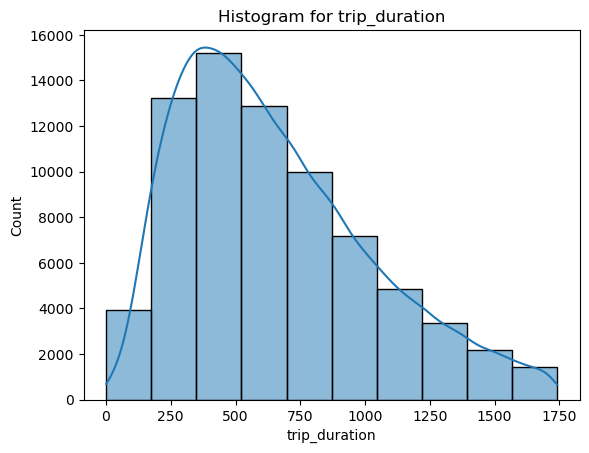

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


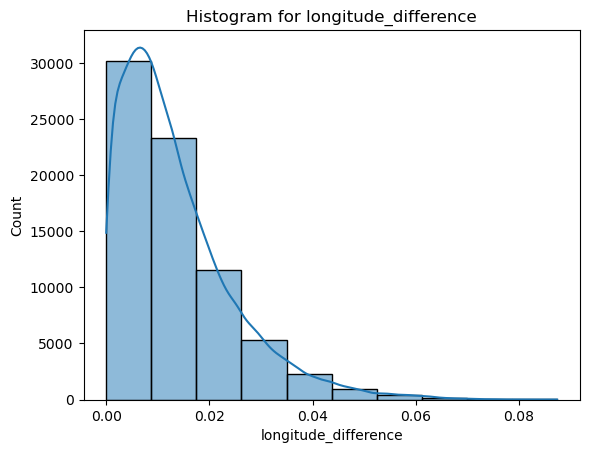

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


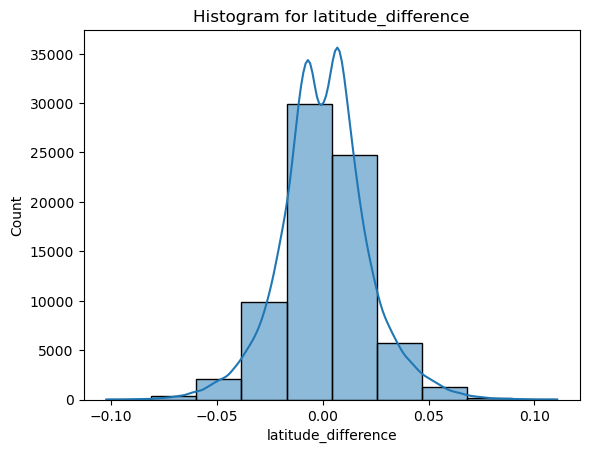

/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhavani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


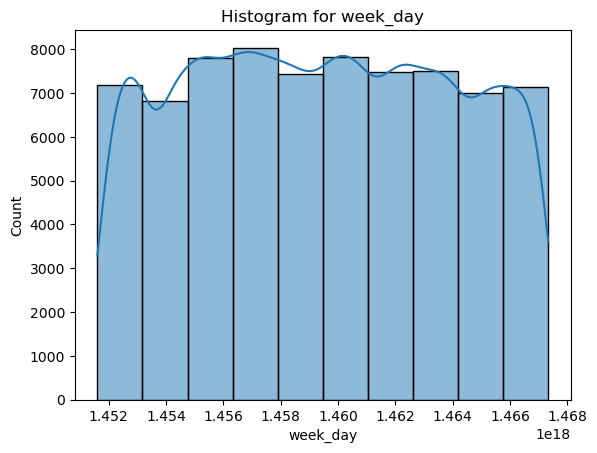

In [240]:
for column in df.columns:
    sns.histplot(df[column], kde=True, bins=10) # You can adjust the␣ ↪number of bins as needed
    plt.title(f'Histogram for {column}') 
    plt.xlabel(column) 
    plt.ylabel
    plt.show()

Histograms help in assessing the normality of the data distribution.Here after doing the histogram there are only few graphs showing the normality mainly for pickup longtitude and dropoff longtitude

In [241]:
import folium
from folium.plugins import HeatMap

def add_markers(map_obj, data, color, marker_type):
    for index, row in data.iterrows():
        coords = [row[f'{marker_type}_latitude'], row[f'{marker_type}_longitude']]
        popup_text = f"{marker_type.capitalize()} {index}"
        icon = folium.Icon(color=color)
        folium.Marker(coords, popup=popup_text, icon=icon).add_to(map_obj)

def create_map_with_markers(data):
    map_center = [data['pickup_latitude'].mean(), data['pickup_longitude'].mean()]
    map_obj = folium.Map(location=map_center, zoom_start=10, control_scale=True)

    add_markers(map_obj, data, 'blue', 'pickup')
    add_markers(map_obj, data, 'pink', 'dropoff')

    return map_obj

def save_and_display_map(map_obj, filename):
    map_obj.save(filename)
    return map_obj

# Sample data
t_data = df.sample(n=100)

# Create and display the map
map_both = create_map_with_markers(t_data)
save_and_display_map(map_both, 'pickup_dropoff_markers.html')

4. **Algorithm and Data Structure Efficiency**:

The first scenario is linked list : 

Linked lists are efficient for frequent insertions and deletions, and they allow dynamic resizing. 

In this scenario, as new data is added frequently, a linked list provides a straightforward way to insert new elements at the end without the need for resizing the entire structure.


The second scenario is Hash Table :
Hash tables provide constant-time average-case complexity for search, insert, and delete operations. 
In this scenario, if add a new trip or take one out, it's as easy as writing or erasing a single entry. No need to redo the whole list.

In [242]:
df.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'longitude_difference', 'latitude_difference', 'week_day'],
      dtype='object')

5. **Final Analysis**:

After 1-4 tasks most of the cases 5. **Final Analysis**:
    
    Based on the analysis from tasks 1-4, Here longitude_difference has 0.27 it means 27% out of 100 records from the given dataset. There is minimum significance so the data can be used in the regreesion moel. Here trip duration is mainly effected by the longtitude differences that means distance between  the pickup and dropoff locations so its great imopact on the trip duration.